# 第25、26题

## 25. Proving $K(x,y)$ is a kernel function

First, $(\mathbf{x}^\top \mathbf{x}')^r$ is a kernel for every $r = 0,1,2,\dots$.
<!--- By the way, $K(\mathbf{x},\mathbf{x}') = 1$ is a kernel function, since its kernel matrices $\mathbf{1}\mathbf{1}^\top$ are positive semidefinite.-->
Therefore,
\begin{equation}
K_r(\mathbf{x},\mathbf{x}') = \sum_{j=1}^r \frac{1}{j!}(\mathbf{x}^\top \mathbf{x}')^j
\end{equation}
are all kernels, and so is the limit $e^{\mathbf{x}^\top \mathbf{x}'} = \lim_{r\rightarrow \infty} K_r(\mathbf{x},\mathbf{x}')$.

More general, if $K(\mathbf{x},\mathbf{x}')$ is a kernel, so is $e^{K(\mathbf{x},\mathbf{x}')}$. Let $\gamma = 1/\sigma^2$. Now,
\begin{equation}
e^{-\frac{\gamma}{2}\|\mathbf{x}-\mathbf{x}'\|^2} = e^{-\frac{\gamma}{2}\|\mathbf{x}\|^2} e^{\gamma \mathbf{x}^\top \mathbf{x}'} e^{-\frac{\gamma}{2}\|\mathbf{x}'\|^2}.
\end{equation}

The middle is a kernel, and we apply normalization rule with $f(\mathbf{x}) = e^{-\frac{\gamma}{2}\|\mathbf{x}\|^2}$.

Thus, the Gaussian kernel is a valid kernel function.

## 26. Calculating a linear SVM

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])


C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)')

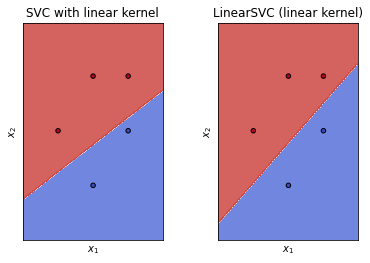

In [4]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()